#  Data Collection & Preparation


In [5]:
import json
import requests
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Task 1 : Selecting API for retieving data

The platform that we have used to look for API is - https://public.opendatasoft.com. We are using UK Gender Pay Gap dataset to perform analysis.

The API to retrieve dataset is - https://public.opendatasoft.com/api/records/1.0/search/?dataset=uk-gender-pay-gap-data

#### Description
The dataset consists of the details of UK Gender Pay Gap for various organizations. 
Some of the important fields in the dataset are explained below. <br>
For a particular organization,
1. diffmeanhourlypercent: The difference between mean hourly pay rate of all male and female employees.
2. diffmedianhourlypercent: The difference between median hourly pay rate of all male and female employees.
3. diffmeanbonuspercent: The difference between mean bonus pay of relevant male and female employees.
4. diffmedianbonuspercent: The difference between median bonus pay of relevant male and female employees.
5. malebonuspercent: The percentage of ratio of bonus obtained by all relevant male employees to all the male employees.
6. femalebonuspercent: The percentage of ratio of bonus obtained by all relevant female employees to all the female employees.
7. malelowerquartile,malelowermiddlequartile,maleuppermiddlequartile,maletopquartile: Different groups for male employees depending on the pay bands.
8. femalelowerquartile,femalelowermiddlequartile,femaleuppermiddlequartile,femaletopquartile: Different groups for female employees depending on the pay bands.

### Task 2 : Collect Data from the API. <br> Task 3 : Parsing the collected data and storing it in a csv file.

The chosen API consists of 10540 records of which there is limit to fetch 10000 records in total with 1000 records per request.
So, below is the code which loops 10 times to fetch records and copies it in a file named UKGenderPayGapData.csv 

In [2]:
startPage = 0       ## variable indicates the record number to start retrieving from

for i in range(0, 10):
    results = []      ##List to store the actual data from the retrieved json dataset
    ##Task 2 : Collecting data from API
    ## Parameters - rows defines the nomber of records and start defines the pagination 
    link = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=uk-gender-pay-gap-data&rows=1000&start=%d"%(startPage)
    response = requests.get(link)
    html = json.loads(response.text)
    
    ##Task 3 : Parsing the data retrieved through API request call and storing in a CSV file
    ## Looping through each record in the list of records retrieved through API request and storing all the field values
    for record in html['records']:
        results.append(record['fields'])
    
    data = pd.DataFrame(results)
    if(i == 0):
        with open("UKGenderPayGapData.csv", "w+", newline='', encoding='utf-8') as f:
            data.to_csv(f)
    else:
        with open("UKGenderPayGapData.csv", "a", newline='', encoding='utf-8') as f:
            data.to_csv(f, header=False)
    
    ## Incrementing startPage by 1000 to indicate the API request call to fetch the next 1000 records.
    startPage = startPage + 1000
    

### Task 4 - Load and represent data in an appropriate data structure. Apply Preprocessing step like clean/filter/combine.

In [3]:
## Feature Selection
## reading data from CSV file, selecting specific columns from the file and storing it in a dataframe
df = pd.read_csv("UKGenderPayGapData.csv", usecols=['employername', 'employersize', 'diffmeanhourlypercent', 
                                                      'diffmedianhourlypercent','diffmeanbonuspercent','diffmedianbonuspercent',
                                                      'malebonuspercent','femalebonuspercent','malelowerquartile',
                                                      'femalelowerquartile','malelowermiddlequartile','femalelowermiddlequartile',
                                                      'maleuppermiddlequartile','femaleuppermiddlequartile','maletopquartile',
                                                      'femaletopquartile'])  

## sorting the order of the columns and storing it in a new dataframe  
df_ReducedData = df[['employername','employersize','diffmeanhourlypercent','diffmedianhourlypercent',
                      'diffmeanbonuspercent','diffmedianbonuspercent','malebonuspercent','femalebonuspercent','malelowerquartile',
                      'femalelowerquartile','malelowermiddlequartile','femalelowermiddlequartile','maleuppermiddlequartile',
                      'femaleuppermiddlequartile','maletopquartile','femaletopquartile']]

## printing the dataframe
df_ReducedData   


,employername,employersize,diffmeanhourlypercent,diffmedianhourlypercent,diffmeanbonuspercent,diffmedianbonuspercent,malebonuspercent,femalebonuspercent,malelowerquartile,femalelowerquartile,malelowermiddlequartile,femalelowermiddlequartile,maleuppermiddlequartile,femaleuppermiddlequartile,maletopquartile,femaletopquartile
0,BIBBY OFFSHORE LIMITED,250 to 499,26.2,30.6,59.3,53.4,100.0,100.0,45.6,54.4,46.3,53.7,76.5,23.5,79.1,20.9
1,BILFINGER INDUSTRIAL AUTOMATION SERVICES LIMITED,250 to 499,35.0,35.0,12.0,-81.0,19.0,3.0,67.0,33.0,96.0,4.0,95.0,5.0,99.0,1.0
2,Blackpool Council,1000 to 4999,0.7,-6.0,0.0,0.0,0.0,0.0,35.4,64.6,37.3,62.7,32.1,67.9,33.5,66.5
3,BLUE APPLE CONTRACT CATERING LIMITED,250 to 499,17.0,18.5,30.0,12.5,58.9,57.9,25.6,74.4,36.4,63.6,33.8,66.2,65.4,34.6
4,Bourne Education Trust,500 to 999,17.5,27.7,0.0,0.0,0.0,0.0,28.1,71.9,15.9,84.1,13.8,86.2,19.9,80.1
5,Bournemouth Churches Housing Association Limited,250 to 499,8.4,0.0,0.0,0.0,0.0,0.0,42.0,58.0,30.9,69.1,33.8,66.2,39.7,60.3
6,BRADFORDS BUILDING SUPPLIES LIMITED,500 to 999,7.1,3.0,59.0,23.0,73.0,68.0,76.0,24.0,79.0,21.0,87.0,13.0,80.0,20.0
7,Braintree District Council,250 to 499,-2.8,-22.0,0.0,0.0,0.0,0.0,75.9,24.1,48.7,51.3,36.6,63.4,48.2,51.8
8,BREHENY CIVIL ENGINEERING LIMITED,250 to 499,33.2,47.3,58.3,20.4,91.7,91.9,73.0,27.0,96.0,4.0,98.0,2.0,99.0,1.0
9,BRIGHTON MARINE PALACE & PIER COMPANY (THE),250 to 499,31.2,2.5,-2483.3,-5822.8,5.0,0.4,58.9,41.1,50.6,49.4,58.0,42.0,75.9,24.1


Performing preprocessing on the selected dataset <br>
<br>
While parsing the data, we encountered the 'Not Provided' values and blank values in employersize column. <br>
So we are removing those values in order to make an effective analysis on the dataset.

In [14]:
## Cleaning the dataset column 'employersize' by removing values that are blank or labeled as 'Not Provided'.
df = df_ReducedData[df_ReducedData.employersize != 'Not Provided']    ## Code to remove 'Not provided' values
df = df.dropna()    ## Code to remove blanks values
df

,employername,employersize,diffmeanhourlypercent,diffmedianhourlypercent,diffmeanbonuspercent,diffmedianbonuspercent,malebonuspercent,femalebonuspercent,malelowerquartile,femalelowerquartile,malelowermiddlequartile,femalelowermiddlequartile,maleuppermiddlequartile,femaleuppermiddlequartile,maletopquartile,femaletopquartile
0,BIBBY OFFSHORE LIMITED,250 to 499,26.2,30.6,59.3,53.4,100.0,100.0,45.6,54.4,46.3,53.7,76.5,23.5,79.1,20.9
1,BILFINGER INDUSTRIAL AUTOMATION SERVICES LIMITED,250 to 499,35.0,35.0,12.0,-81.0,19.0,3.0,67.0,33.0,96.0,4.0,95.0,5.0,99.0,1.0
2,Blackpool Council,1000 to 4999,0.7,-6.0,0.0,0.0,0.0,0.0,35.4,64.6,37.3,62.7,32.1,67.9,33.5,66.5
3,BLUE APPLE CONTRACT CATERING LIMITED,250 to 499,17.0,18.5,30.0,12.5,58.9,57.9,25.6,74.4,36.4,63.6,33.8,66.2,65.4,34.6
4,Bourne Education Trust,500 to 999,17.5,27.7,0.0,0.0,0.0,0.0,28.1,71.9,15.9,84.1,13.8,86.2,19.9,80.1
5,Bournemouth Churches Housing Association Limited,250 to 499,8.4,0.0,0.0,0.0,0.0,0.0,42.0,58.0,30.9,69.1,33.8,66.2,39.7,60.3
6,BRADFORDS BUILDING SUPPLIES LIMITED,500 to 999,7.1,3.0,59.0,23.0,73.0,68.0,76.0,24.0,79.0,21.0,87.0,13.0,80.0,20.0
7,Braintree District Council,250 to 499,-2.8,-22.0,0.0,0.0,0.0,0.0,75.9,24.1,48.7,51.3,36.6,63.4,48.2,51.8
8,BREHENY CIVIL ENGINEERING LIMITED,250 to 499,33.2,47.3,58.3,20.4,91.7,91.9,73.0,27.0,96.0,4.0,98.0,2.0,99.0,1.0
9,BRIGHTON MARINE PALACE & PIER COMPANY (THE),250 to 499,31.2,2.5,-2483.3,-5822.8,5.0,0.4,58.9,41.1,50.6,49.4,58.0,42.0,75.9,24.1


### Task 5 : Analysis and summarisation of clean dataset.

Analysis 1 : Comparing the bonus percent of Male to Female for Companies of different sizes

In [15]:
malebonuspercent = []
femalebonuspercent = []
employersize = []
## Converting the columns 'malebonuspercent' and 'femalebonuspercent' to numeric type
df[["malebonuspercent", "femalebonuspercent"]] = df[["malebonuspercent", "femalebonuspercent"]].apply(pd.to_numeric) 
## Calculating mean for both the columns based on employer size group
malebonuspercent = df.groupby('employersize').malebonuspercent.mean()
femalebonuspercent = df.groupby('employersize').femalebonuspercent.mean()
employersize = df.employersize.unique()

In [16]:
## Sorting the employer size label in ascending order
Mbonus = []
Fbonus = []
empSize = []
index_sort=[5,0,2,1,4,3]
for i in range(0,len(index_sort)):
   Mbonus.append(malebonuspercent[index_sort[i]])
   Fbonus.append(femalebonuspercent[index_sort[i]])
   empSize.append(employersize[index_sort[i]])

## Creating a new dataframe with the required values to plot graph
df_toPlot = pd.DataFrame(list(zip(Mbonus, Fbonus)), columns=["malebonuspercent", "femalebonuspercent"], index = [empSize])
df_toPlot

,malebonuspercent,femalebonuspercent
Less than 250,29.532090,27.811940
250 to 499,35.392000,34.138571
500 to 999,34.973739,33.656048
1000 to 4999,44.460317,45.517460
"5000 to 19,999",31.463158,29.012679
"20,000 or more",37.083452,35.193606


Text(0.5, 1.0, 'Comparision of bonus percent ratio of Male and Female in organisations of different sizes')

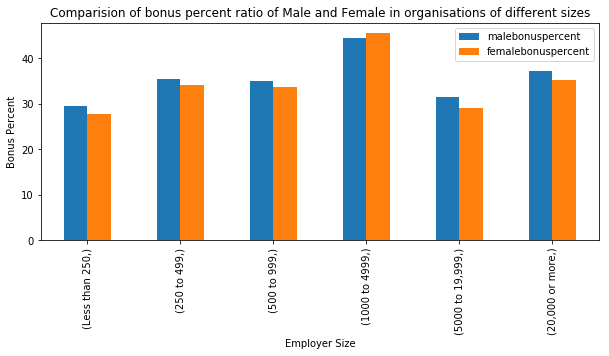

In [17]:
## Grouped Bar chart to represent the bonus percent of Male and Female

p = df_toPlot.plot.bar(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Bonus Percent")
p.set_title("Comparision of bonus percent ratio of Male and Female in organisations of different sizes")

([<matplotlib.axis.XTick at 0x1bc3d180630>,
 <a list of 6 Text xticklabel objects>)

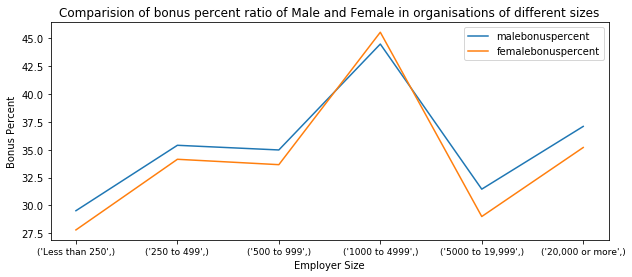

In [18]:
## Line chart to represent the bonus percent of Male and Female

p = df_toPlot.plot.line(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Bonus Percent")
p.set_title("Comparision of bonus percent ratio of Male and Female in organisations of different sizes")
plt.xticks(list(range(6)), df_toPlot.index, fontsize=9)

#### Observations:
1. Female bonus ratio is more than male bonus ratio for organizations with strength 1000 to 4999.
2. Although the increase of the bonus was observed with the increase in the employee size of the organization, there was a sudden drop of male and female bonus ratio in organizations of strength 5000 to 19999.

Analysis 2 : Comparing the proportion of Male employees on lowest hourly pay rate to highest hourly pay rate 

In [19]:
malelowerquartile = []
maletopquartile = []
malelowermiddlequartile = []
maleuppermiddlequartile = []
df[["malelowerquartile", "maletopquartile" , "malelowermiddlequartile", "maleuppermiddlequartile"]] = df[["malelowerquartile", "maletopquartile", "malelowermiddlequartile","maleuppermiddlequartile"]].apply(pd.to_numeric)
malelowerquartile = df.groupby('employersize').malelowerquartile.mean()
maletopquartile = df.groupby('employersize').maletopquartile.mean()
malelowermiddlequartile = df.groupby('employersize').malelowermiddlequartile.mean()
maleuppermiddlequartile = df.groupby('employersize').maleuppermiddlequartile.mean()

In [20]:
## Sorting the employer size label in ascending order
LowerPay = []
HigherPay = []
LowerMiddlePay = []
UpperMiddlePay = []
empSize = []
index_sort=[5,0,2,1,4,3]
for i in range(0,len(index_sort)):
    LowerPay.append(malelowerquartile[index_sort[i]])
    HigherPay.append(maletopquartile[index_sort[i]])
    LowerMiddlePay.append(malelowermiddlequartile[index_sort[i]])
    UpperMiddlePay.append(maleuppermiddlequartile[index_sort[i]])
    empSize.append(employersize[index_sort[i]])

## Creating a new dataframe with the required values to plot graph
df_toPlot = pd.DataFrame(list(zip(LowerPay, LowerMiddlePay, UpperMiddlePay, HigherPay)), columns=["malelowerquartile", "malelowermiddlequartile", "maleuppermiddlequartile", "maletopquartile"], index = [empSize])
df_toPlot

,malelowerquartile,malelowermiddlequartile,maleuppermiddlequartile,maletopquartile
Less than 250,41.252985,46.730224,52.458209,55.593284
250 to 499,45.712238,49.486238,53.559381,59.534810
500 to 999,46.955717,51.418462,55.761467,61.932210
1000 to 4999,42.652381,43.423810,48.542857,59.617460
"5000 to 19,999",40.867943,43.050000,47.002392,55.074880
"20,000 or more",47.582449,51.781488,56.429628,61.732971


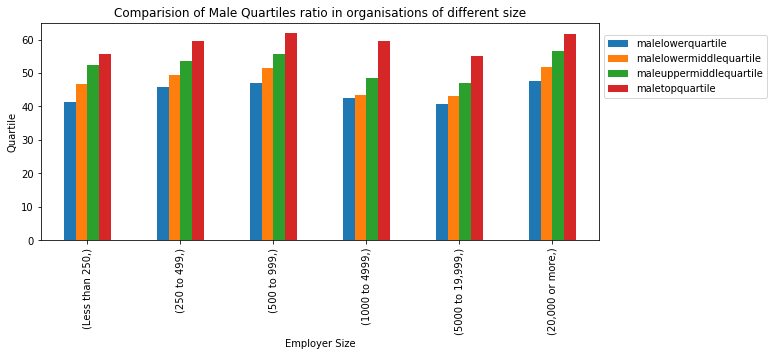

In [21]:
## Grouped Bar chart 

p = df_toPlot.plot.bar(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Quartile")
p.set_title("Comparision of Male Quartiles ratio in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))

([<matplotlib.axis.XTick at 0x1bc3ef95ac8>,
 <a list of 6 Text xticklabel objects>)

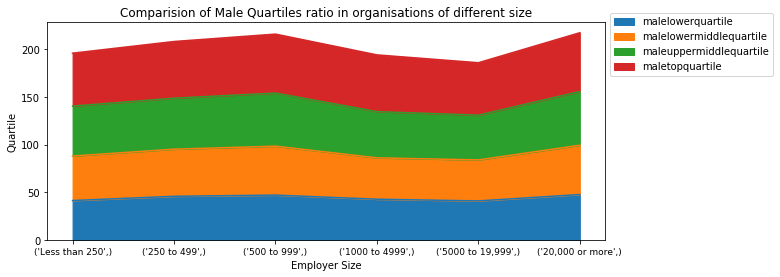

In [23]:
## Stacked Area chart 

p = df_toPlot.plot.area(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Quartile")
p.set_title("Comparision of Male Quartiles ratio in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
plt.xticks(list(range(6)), df_toPlot.index, fontsize=9)

#### Observations:
1. The lower quartile pay of organizations with employee size 250-999 is better than organizations with employee size 1000-19999.
2. All quartile pay values of organizations with employee size less than 250 to 999 are comparatively better when compared to organizations with employee size 1000-19999.
3. The organizations with employee size greater than 20000 have better quartile pay values along all groups when compared to organizations with employee size less than 20000.

Analysis 3 : Comparing the proportion of Female employees on lowest hourly pay rate to highest hourly pay rate 

In [141]:
femalelowerquartile = []
femaletopquartile = []
femalelowermiddlequartile = []
femaleuppermiddlequartile = []
df[["femalelowerquartile", "femaletopquartile"]] = df[["femalelowerquartile", "femaletopquartile"]].apply(pd.to_numeric)
femalelowerquartile = df.groupby('employersize').femalelowerquartile.mean()
femaletopquartile = df.groupby('employersize').femaletopquartile.mean()
femalelowermiddlequartile = df.groupby('employersize').femalelowermiddlequartile.mean()
femaleuppermiddlequartile = df.groupby('employersize').femaleuppermiddlequartile.mean()

In [142]:
## Sorting the employer size label in ascending order
LowerPay = []
HigherPay = []
LowerMiddlePay = []
UpperMiddlePay = []
empSize = []
index_sort=[5,0,2,1,4,3]
for i in range(0,len(index_sort)):
    LowerPay.append(femalelowerquartile[index_sort[i]])
    HigherPay.append(femaletopquartile[index_sort[i]])
    LowerMiddlePay.append(femalelowermiddlequartile[index_sort[i]])
    UpperMiddlePay.append(femaleuppermiddlequartile[index_sort[i]])
    empSize.append(employersize[index_sort[i]])

## Creating a new dataframe with the required values to plot graph
df_toPlot = pd.DataFrame(list(zip(LowerPay, LowerMiddlePay, UpperMiddlePay, HigherPay)), columns=["femalelowerquartile", "femalelowermiddlequartile", "femaleuppermiddlequartile", "femaletopquartile"], index = [empSize])
df_toPlot

,femalelowerquartile,femalelowermiddlequartile,femaleuppermiddlequartile,femaletopquartile
Less than 250,58.747015,53.269776,47.541791,44.406716
250 to 499,54.287762,50.513762,46.440619,40.465190
500 to 999,53.044283,48.581538,44.238533,38.067790
1000 to 4999,57.347619,56.576190,51.457143,40.382540
"5000 to 19,999",59.132057,56.950000,52.997608,44.925120
"20,000 or more",52.417551,48.218512,43.570372,38.267029


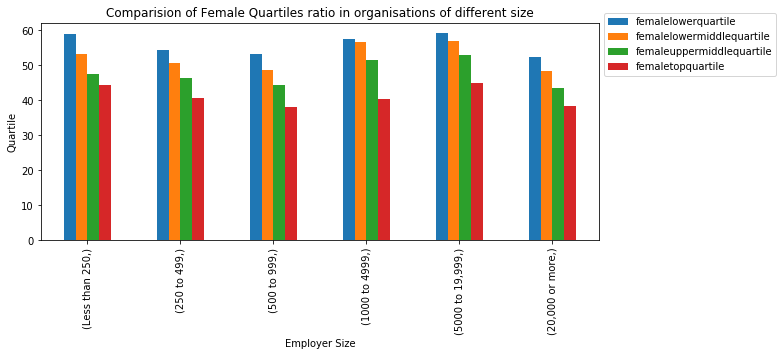

In [143]:
## Grouped Bar chart

p = df_toPlot.plot.bar(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Quartile")
p.set_title("Comparision of Female Quartiles ratio in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

([<matplotlib.axis.XTick at 0x1eb77742748>,
 <a list of 6 Text xticklabel objects>)

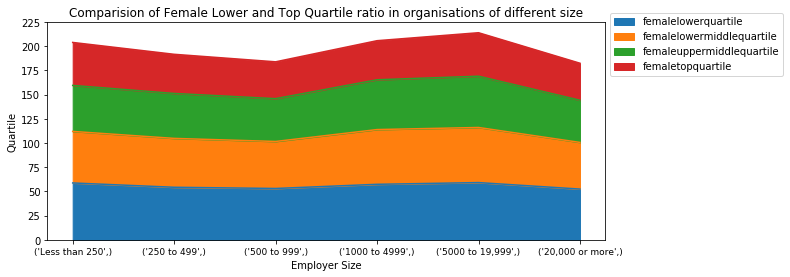

In [144]:
## Stacked Area chart 

p = df_toPlot.plot.area(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("Quartile")
p.set_title("Comparision of Female Lower and Top Quartile ratio in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
plt.xticks(list(range(6)), df_New.index, fontsize=9)

#### Observations:
1. The ratio of females that belong to lower quartile group is higher than the ratio of fermales that belong to higher quartile group.
2. All quartile values of organizations with employee size from 1000 to 19999 are comparatively better when compared to organizations with employee size 250 to 999.


Analysis 4 : Comparing the difference in hourly rate of male and female in top 5 organisations in UK

In [123]:
df["diffmeanhourlypercent"] = df["diffmeanhourlypercent"].apply(pd.to_numeric)
dflargest = df.nlargest(5, 'diffmeanhourlypercent')
df_toPlot = dflargest[["employername", "diffmeanhourlypercent"]]
df_toPlot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,employername,diffmeanhourlypercent
7709,MILLWALL HOLDINGS PLC,159.0
5758,MINT PAY SOLUTIONS LTD,94.0
3652,STOKE CITY FOOTBALL CLUB LIMITED,92.5
3012,"BURNLEY FOOTBALL & ATHLETIC COMPANY, LIMITED(THE)",88.4
8530,SWANSEA CITY ASSOCIATION FOOTBALL CLUB LIMITED...,87.8


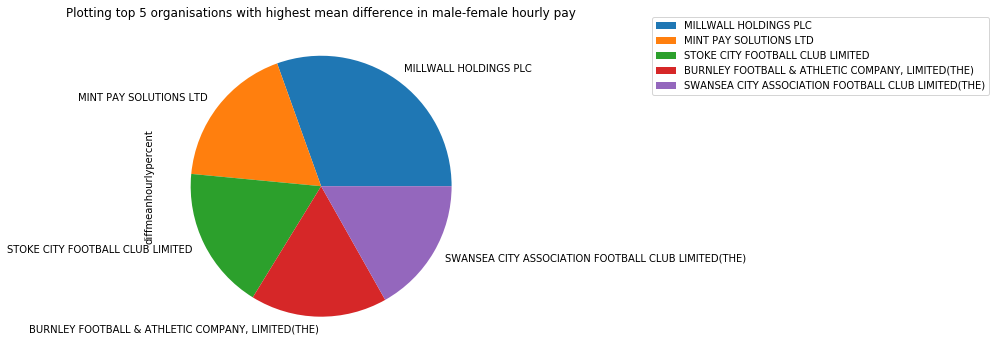

In [124]:
## Pie chart

p = df_toPlot.set_index('employername').plot.pie(y='diffmeanhourlypercent', figsize=(6, 6))
p.set_title("Plotting top 5 organisations with highest mean difference in male-female hourly pay")
p.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))

#### Observations:
Millwall Holdings PLC has highest mean difference in male-female hourly pay rate.

Analysis 5 : Comparing the difference in hourly rate and hourly bonus of male and female in organisations of different sizes

In [24]:
diffmeanhourlypercent = diffmeanbonuspercent = []
df[["diffmeanhourlypercent", "diffmeanbonuspercent"]] = df[["diffmeanhourlypercent", "diffmeanbonuspercent"]].apply(pd.to_numeric)
diffmeanhourlypercent = df.groupby('employersize').diffmeanhourlypercent.mean()
diffmeanbonuspercent = df.groupby('employersize').diffmeanbonuspercent.mean()

In [25]:
## Sorting the employer size label in ascending order
diffHourlyRate = []
diffBonus = []
empSize = []
index_sort=[5,0,2,1,4,3]
for i in range(0,len(index_sort)):
   diffHourlyRate.append(diffmeanhourlypercent[index_sort[i]])
   diffBonus.append(diffmeanbonuspercent[index_sort[i]])
   empSize.append(employersize[index_sort[i]])

## Creating a new dataframe with the required values to plot graph
df_toPlot = pd.DataFrame(list(zip(diffHourlyRate, diffBonus)), columns=["diffmeanhourlypercent", "diffmeanbonuspercent"], index = [empSize])
df_toPlot

,diffmeanhourlypercent,diffmeanbonuspercent
Less than 250,12.878731,12.426119
250 to 499,13.918143,19.963714
500 to 999,14.725116,-8.349438
1000 to 4999,14.504762,36.061905
"5000 to 19,999",15.072488,29.803589
"20,000 or more",14.432595,18.801087


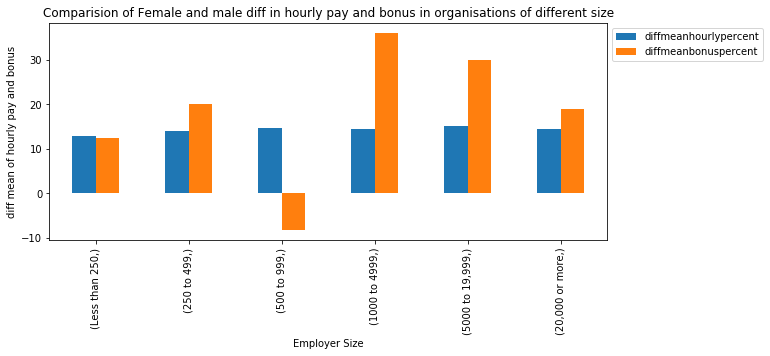

In [26]:
## Grouped Bar chart

p = df_toPlot.plot.bar(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("diff mean of hourly pay and bonus")
p.set_title("Comparision of Female and male diff in hourly pay and bonus in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

([<matplotlib.axis.XTick at 0x1bc3f098240>,
 <a list of 6 Text xticklabel objects>)

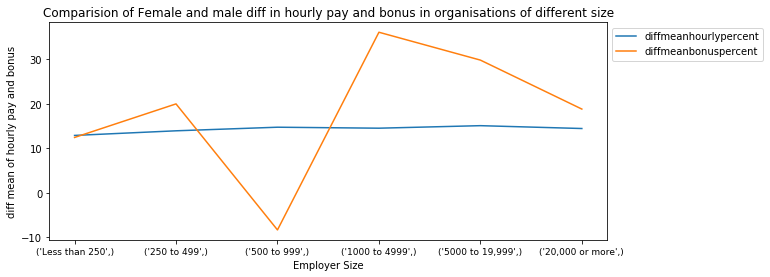

In [27]:
## Line chart

p = df_toPlot.plot.line(figsize=(10, 4))
p.set_xlabel("Employer Size")
p.set_ylabel("diff mean of hourly pay and bonus")
p.set_title("Comparision of Female and male diff in hourly pay and bonus in organisations of different size")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
plt.xticks(list(range(6)), df_toPlot.index, fontsize=9)

#### Observations:
1. The mean difference of hourly pay rate is almost same across all the organizations.
2. The mean difference of bonus is very low for organizations with employee size 500 to 999 and very high for organizations with employee size 1000 to 4999.

### Conclusion
Even though the difference in male and female hourly pay is almost same across all organizations, the bonus percent of female is less than male. The ratio of female in top quartile group is less than ratio of male in top quartile group. <br>
Further in-depth analysis and research could be carried out in order to derive statistically significant results.